<a href="https://colab.research.google.com/github/ShinwooChoi/ESAA/blob/main/9_5_ESAA_OB_%ED%95%84%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##4.1 선형회귀

1. 기본 개념
- **목표**: 입력 특징값과 결과값 사이의 선형 관계를 모델링
- **예시**: 삶의 만족도 = θ₀ + θ₁ × 1인당 GDP

---

2. 일반적 선형 회귀식
- **수식 (스칼라 형태)**  
  ŷ = θ₀ + θ₁x₁ + θ₂x₂ + ... + θₙxₙ  
  - ŷ: 예측값  
  - xⱼ: j번째 특징값  
  - θⱼ: j번째 파라미터 (θ₀은 편향, bias)

- **벡터 형태**  
  ŷ = hθ(x) = θᵀ · x  
  - θ: 파라미터 벡터 [θ₀, θ₁, ..., θₙ]  
  - x: 특징 벡터 [x₀, x₁, ..., xₙ] (x₀ = 1)  
  - hθ(x): 가설 함수(hypothesis)

---

3. 학습 (Training)
- 모델을 학습시킨다는 것 → **θ를 데이터에 가장 잘 맞게 찾는 것**  
- 얼마나 잘 맞는지 평가 → **오차(에러)를 측정**  

---

4. 오차 측정 지표
- **RMSE (Root Mean Square Error)**: 제곱 오차의 평균의 제곱근
- **MSE (Mean Square Error)**: 제곱 오차의 평균  
  - 더 단순해서 학습 시 주로 사용

---

5. 비용 함수 (Cost Function)
- 훈련 집합 X에 대해 MSE 정의:

  MSE(X, hθ) = (1/m) Σ (θᵀx⁽ⁱ⁾ − y⁽ⁱ⁾)²  
  - m: 샘플 수  
  - x⁽ⁱ⁾: i번째 샘플의 특징 벡터  
  - y⁽ⁱ⁾: i번째 샘플의 실제 값

##4.1.1 정규방정식

1. 개념
- 비용 함수(MSE)를 최소화하는 **θ 파라미터**를 구하는 해석적 방법
- 반복적인 학습(경사하강법 등) 없이, 바로 공식을 통해 θ값 계산 가능

---

2. 수식

**정규방정식 (Normal Equation)**  

θ̂ = (XᵀX)⁻¹ Xᵀy  

- θ̂ : 비용 함수를 최소화하는 파라미터 벡터
- X : 입력 특징 행렬 (m × n)  
- y : 타깃 벡터 (m × 1)  


In [1]:
import numpy as np

X=2*np.random.rand(100,1)
y=4+3*X+np.random.randn(100,1)

In [2]:
X_b=np.c_[np.ones((100,1)),X] # 모든 샘플에 x0=1 추가
theta_best=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [3]:
theta_best

array([[4.03085306],
       [3.06880959]])

In [4]:
X_new=np.array([[0],[2]])
X_new_b=np.c_[np.ones((2,1)),X_new] # 모든 샘플에 x0=1 추가
y_predict=X_new_b.dot(theta_best)
y_predict

array([[ 4.03085306],
       [10.16847224]])

In [5]:
import matplotlib.pyplot as plt

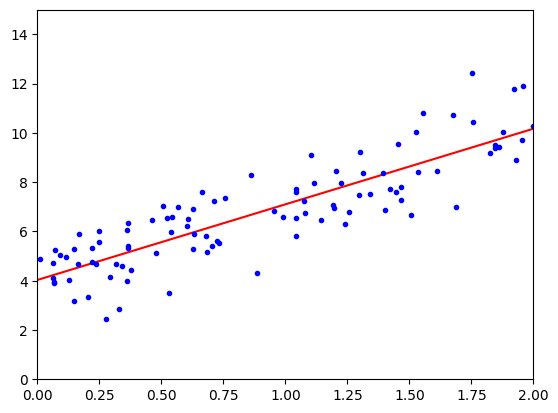

In [6]:
plt.plot(X_new,y_predict,"r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

In [9]:
lin_reg.intercept_,lin_reg.coef_ # 가중치, 편향 계산

(array([4.03085306]), array([[3.06880959]]))

In [10]:
lin_reg.predict(X_new)

array([[ 4.03085306],
       [10.16847224]])

In [11]:
theta_best_svd,residuals,rank,s=np.linalg.lstsq(X_b,y,rcond=1e-6)
theta_best_svd

array([[4.03085306],
       [3.06880959]])

In [12]:
np.linalg.pinv(X_b).dot(y)

array([[4.03085306],
       [3.06880959]])

## 4.1.2 계산 복잡도

- 정규방정식 :
 (n+1)x(n+1)크기의 X^TX 의 역행렬을 계산(n은 특성 수)

- 사이킷런의 LinearRegression 클래스가 사용하는 SVD 방법 :
 O(n^2)-> 특성 수가 두 배로 늘어나면(n=2) 계산 시간이 대략 4배 증가.

## 4.2 경사 하강법
- 경사하강법(GD) : 여러 종류의 문제에서 최적의 해법을 찾을 수 있는 일반적인 최적화 알고리즘
- 기본 아이디어 : 비용 함수를 최소화하기 위해 반복해서 파라미터
를 조정해가는 것(gradient가 감소하는 방향으로)

<경사 하강법의 문제점>

(왼쪽에서 시작하는 경우) 위와 같은 그림처럼 비용함수가 매끈하지 않을 때 전역 최솟값보다 지역 최솟값을 먼저 만남

(오른쪽에서 시작하는 경우) 오른쪽 지역은 왼쪽보다 상당히 평탄해 전역 최솟값까지 도달하는 데 오래 걸림

## 4.2.1 배치 경사 하강법

In [13]:
eta=0.1 # 학습률
n_iterations=1000
m=100

theta=np.random.randn(2,1) # 무작위 초기화

for iteration in range(n_iterations):
  gradients=2/m*X_b.T.dot(X_b.dot(theta)-y)
  theta=theta-eta*gradients

In [14]:
theta

array([[4.03085306],
       [3.06880959]])

##4.2.2 확률적 경사 하강법

In [15]:
n_epochs=50 # 반복 횟수
t0,t1=5,50 # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
  return t0/(t+t1)

theta=np.random.randn(2,1) # 무작위 초기화

for epoch in range(n_epochs):
  for i in range(m):
    random_index=np.random.randint(m)
    xi=X_b[random_index:random_index+1]
    yi=y[random_index:random_index+1]
    gradients=2*xi.T.dot(xi.dot(theta)-yi)
    eta=learning_schedule(epoch*m+i)
    theta=theta-eta*gradients

In [16]:
theta

array([[4.07600082],
       [3.09981865]])

In [17]:
from sklearn.linear_model import SGDRegressor
sgd_reg=SGDRegressor(max_iter=1000,tol=1e-3,penalty=None,eta0=0.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [18]:
sgd_reg.intercept_,sgd_reg.coef_

(array([4.01385587]), array([3.04291258]))

##4.2.3 미니배치 경사 하강법


- 미니배치 경사 하강법 : 각 스텝에서 전체 훈련 세트(배치 경사하강법에서처럼)나 하나의 샘플(확률적 경사 하강법에서처럼)을 기반으로 그레이디언트를 계산하는 것이 아니라 미니배치라 부르는 임의의 작은 샘플 세트에 대해 그레이디언트를 계산
- 장점 : 미니배치를 어느 정도 크게 하면 이 알고리즘은 파라미터 공간에서 SGD보다 덜 불규칙하게 움직임

##4.3 다항 회귀

각 특성의 거듭제곱을 새로운 특성으로 추가하고, 이 확장된 특성을 포함한 데이터셋에 선형 모델을 훈련시키는 방법

In [19]:
m=100
X=6*np.random.rand(m,1)-3
y=0.5*X**2+X+2+np.random.randn(m,1)

In [20]:
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=2,include_bias=False)
X_poly=poly_features.fit_transform(X)
X[0]

array([2.45823067])

In [21]:
X_poly[0]

array([2.45823067, 6.04289805])

In [22]:
lin_reg=LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_, lin_reg.coef_

(array([1.71643812]), array([[1.00131891, 0.56914526]]))

##4.4 학습 곡선

- 모델의 일반화 성능 추정위해 사용
- 훈련 세트와 검증 세트의 모델 성능을 훈련 세트 크기의 함수로 나타냄
- 그래프 생성을 위해서 단순히 훈련 세트에서 크기가 다른 서브 세트를 만들어 모델을 여러 번 훈련시키면 됨

In [23]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model,X,y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
  plt.plot(np.sqrt(train_errors),"r+",linewidth=2,label="train")
  plt.plot(np.sqrt(val_errors),"b-",linewidth=3,label="val")

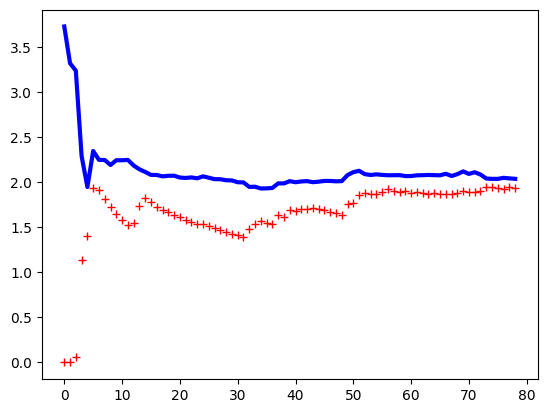

In [25]:
lin_reg=LinearRegression()
plot_learning_curves(lin_reg,X,y)

- 훈련 데이터:

그래프가 0에서 시작 -> 훈련 세트에 1혹은 2개의 샘플이 있을 땐 모델 완벽하게 작동
하지만 샘플이 추가되면서 모델이 훈련 데이터를 완벽히 학습하기 불가능

- 검증 데이터:

초기 오차는 매우 큼 -> 적은 수의 훈련 샘플로 훈련될 때는 제대로 일반화 불가능
샘플이 추가됨에 따라 학습이 되고 검증 오차 천천히 감소

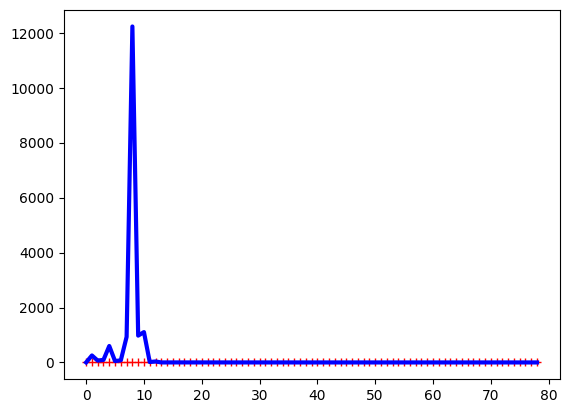

In [26]:
from sklearn.pipeline import Pipeline

polynomial_regression=Pipeline([
    ("poly_features",PolynomialFeatures(degree=10,include_bias=False)),
    ("sgd_reg",LinearRegression())
])

plot_learning_curves(polynomial_regression,X,y)